# Step 2: Clean Network

This is a further post-processing function now found within the network_clean GOSTnets submodule. This function cleans the network by removing excessive nodes, and ensures all edges are bi-directional (except in the case of one-way roads).

WARNING: The Clean Network function is a computationally expensive function, so it may take a while to run. It outputs a pickled graph object, a dataframe of the edges, and a dataframe of the nodes. The expectation is that this will only have to be run once.

In [1]:
import os, sys
import time
import networkx as nx

In [2]:
# add to your system path the location of the LoadOSM.py and GOSTnet.py scripts
sys.path.append("../")
import GOSTnets as gn

In [3]:
pth = "./" # change this path to your working folder
data_pth = os.path.join(pth, 'tutorial_outputs')

# read back your graph from step 1 from you saved pickle
G = nx.read_gpickle(os.path.join(data_pth, 'iceland_unclean.pickle'))

In [4]:
G_original = G.copy()

## Optional step: Only use the largest sub-graph
Network analysis is often done on only connected graphs. Disconnected graphs can result in paths that cannot reach their destination. Also, you can evaluate how connected your network is and have the option of going back and making more edits.

In [5]:
# Identify only the largest graph

# compatible with NetworkX 2.4
list_of_subgraphs = list(G.subgraph(c).copy() for c in nx.strongly_connected_components(G))
max_graph = None
max_edges = 0
for i in list_of_subgraphs:
    if i.number_of_edges() > max_edges:
        max_edges = i.number_of_edges()
        max_graph = i

# set your graph equal to the largest sub-graph
G = max_graph

How many subgraphs would you guess there are?

In [6]:
len(list_of_subgraphs)

In [7]:
# inspect the resulting Graph
nodes = list(G.nodes(data=True))
edges = list(G.edges(data=True))
print(len(nodes))
print(nodes[0])
print(len(edges))
print(edges[0])

4393
(8194, {'x': -21.8741713, 'y': 64.1314856})
6040
(8194, 85, {'Wkt': <shapely.geometry.linestring.LineString object at 0x0000015A0EF7F748>, 'id': 15640, 'infra_type': 'secondary', 'osm_id': '497230128', 'key': 'edge_15640', 'length': 0.010663109876585126})


In [8]:
# To become familiar with the function read the doc string
gn.clean_network?

Set up some parameters for the CleanNetwork function

In [9]:
Iceland_UTMZ = {'init': 'epsg:32627'}

WGS = {'init': 'epsg:4326'} # do not adjust. OSM natively comes in ESPG 4326

Run the CleanNetwork Function. It will write the outputs in the specified wpath because we have verbose as True.

In [10]:
print('start: %s\n' % time.ctime())
gn.clean_network(G, wpath = data_pth, output_file_name = 'iceland_network', UTM = Iceland_UTMZ, WGS = {'init': 'epsg:4326'}, junctdist = 10, verbose = True)
print('\nend: %s' % time.ctime())
print('\n--- processing complete')

start: Mon Feb 24 12:12:13 2020



C:\WBG\Anaconda\envs\network-analysis\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\WBG\Anaconda\envs\network-analysis\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\WBG\Anaconda\envs\network-analysis\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(+init=epsg:4326 +type=crs != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)


4162
7473


C:\WBG\Anaconda\envs\network-analysis\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


2850
5345
Edge reduction: 6040 to 5345 (11 percent)

end: Mon Feb 24 12:12:20 2020

--- processing complete


At this point, our road network is fully prepped. 
Move on to Step 3 to see how we can use this network for some travel time analysis!

#### Optional: Compare networks (original / largest subgraph / clean-version)

Load clean version of the network

In [11]:
G_clean = nx.read_gpickle(os.path.join(pth, 'tutorial_outputs', r'iceland_network_processed.pickle'))

OSMNX is one of the key libraries that GostNETS is based on. Here, we re-load it to access graph-plotting functions.

In [12]:
import osmnx as ox

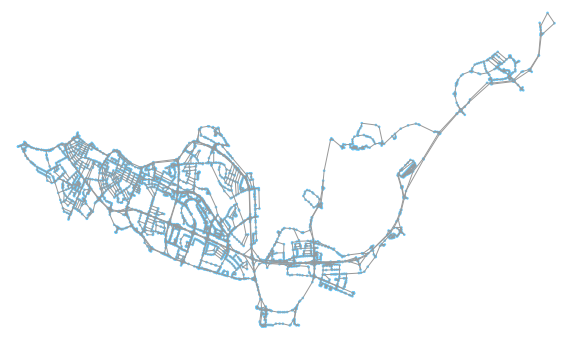

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15a0f0c8828>)

In [13]:
# plotting functions only work if the graphs have a name and a crs attribute
G.graph['crs'] = 'epsg:32646'
G.graph['name'] = 'Iceland'

# largest connected subgraph
ox.plot_graph(G, fig_width=10, edge_linewidth=1, node_size=7)

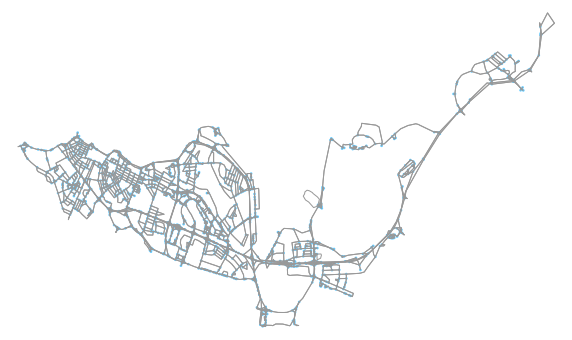

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15a0fbeab38>)

In [14]:
G_clean.graph['crs'] = 'epsg:32646'
G_clean.graph['name'] = 'Iceland'

# cleaned graph
ox.plot_graph(G_clean, fig_width=10, edge_linewidth=1, node_size=7)

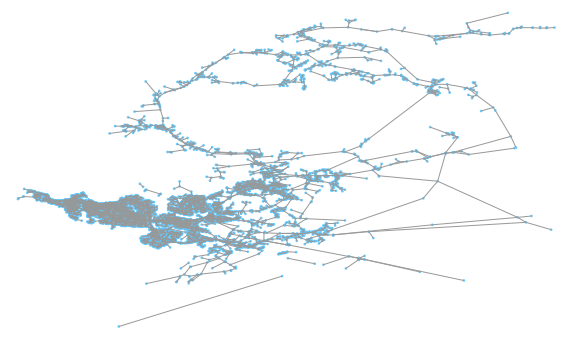

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15a0f0db1d0>)

In [15]:
G_original.graph['crs'] = 'epsg:32646'
G_original.graph['name'] = 'Iceland'

# original un-connected graph
ox.plot_graph(G_original, fig_width=10, edge_linewidth=1, node_size=7)